In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [3]:
dataset = pd.read_csv('final_dataset_3.csv')
dataset = dataset.set_index('Unnamed: 0')

In [4]:
dataset_perc = dataset[dataset.columns.drop(list(dataset.filter(regex='abs')))]

x_features = [col for col in dataset.columns if 'perc' in col]
y_labels = [col for col in dataset.columns if 'change_in' in col]

In [5]:
dataset_perc

,form_time,eda_time,eda_perc_change,perc_bpm,perc_ibi,perc_sdnn,perc_sdsd,perc_rmssd,perc_pnn20,perc_pnn50,...,gender,change_in_stressed,change_in_amused,change_in_nervous,change_in_engaged,change_in_lost,change_in_disappointed,change_in_excited,change_in_frustrated,change_in_contempt
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2022-03-02 14:11,2022-03-02 14:20:01,19.174717,1.105372,0.904673,0.758386,0.639516,0.528432,0.652632,0.388471,...,Male,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2022-03-02 14:28,2022-03-02 14:31:56,-36.539961,0.905580,1.104264,1.913173,1.494328,1.810519,1.428571,2.666667,...,Female,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-03-02 14:41,2022-03-02 14:45:20,-18.175823,1.233378,0.810781,1.243654,1.474264,1.457498,0.921053,1.246964,...,Male,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,2022-03-02 14:56,2022-03-02 15:03:31,-11.869750,1.259298,0.794093,2.980787,2.251378,2.582955,1.000000,1.470588,...,Male,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-03-02 15:18,2022-03-02 15:20:38,12.059950,0.946140,1.056926,1.415998,1.209645,1.223343,1.240385,1.791667,...,Male,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2022-03-08 15:18,2022-03-08 15:22:44,73.181025,1.276181,0.783588,1.665727,2.400520,3.334103,1.944444,8.750000,...,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-03-08 15:48,2022-03-08 15:52:03,-33.060336,1.036094,0.965163,3.190159,2.624728,3.570906,1.191067,2.115385,...,Female,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-03-08 16:00,2022-03-08 16:04:14,-12.953205,0.909589,1.099398,0.769442,1.553925,1.968773,1.500000,1.250000,...,Female,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8,2022-03-08 16:11,2022-03-08 16:13:46,57.804164,1.233832,0.810483,1.226543,0.588983,0.838645,1.757396,1.780220,...,Male,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [6]:
dataset_perc['eda_perc_change']/=100
dataset_perc['eda_perc_change']+=1


C:\Users\Rob\AppData\Local\Temp\ipykernel_5032\3266278917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_perc['eda_perc_change']/=100
C:\Users\Rob\AppData\Local\Temp\ipykernel_5032\3266278917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_perc['eda_perc_change']+=1


In [7]:
dataset_perc

,form_time,eda_time,eda_perc_change,perc_bpm,perc_ibi,perc_sdnn,perc_sdsd,perc_rmssd,perc_pnn20,perc_pnn50,...,gender,change_in_stressed,change_in_amused,change_in_nervous,change_in_engaged,change_in_lost,change_in_disappointed,change_in_excited,change_in_frustrated,change_in_contempt
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,2022-03-02 14:11,2022-03-02 14:20:01,1.191747,1.105372,0.904673,0.758386,0.639516,0.528432,0.652632,0.388471,...,Male,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2022-03-02 14:28,2022-03-02 14:31:56,0.634600,0.905580,1.104264,1.913173,1.494328,1.810519,1.428571,2.666667,...,Female,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2022-03-02 14:41,2022-03-02 14:45:20,0.818242,1.233378,0.810781,1.243654,1.474264,1.457498,0.921053,1.246964,...,Male,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
3,2022-03-02 14:56,2022-03-02 15:03:31,0.881303,1.259298,0.794093,2.980787,2.251378,2.582955,1.000000,1.470588,...,Male,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-03-02 15:18,2022-03-02 15:20:38,1.120599,0.946140,1.056926,1.415998,1.209645,1.223343,1.240385,1.791667,...,Male,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,2022-03-08 15:18,2022-03-08 15:22:44,1.731810,1.276181,0.783588,1.665727,2.400520,3.334103,1.944444,8.750000,...,Male,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-03-08 15:48,2022-03-08 15:52:03,0.669397,1.036094,0.965163,3.190159,2.624728,3.570906,1.191067,2.115385,...,Female,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-03-08 16:00,2022-03-08 16:04:14,0.870468,0.909589,1.099398,0.769442,1.553925,1.968773,1.500000,1.250000,...,Female,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
8,2022-03-08 16:11,2022-03-08 16:13:46,1.578042,1.233832,0.810483,1.226543,0.588983,0.838645,1.757396,1.780220,...,Male,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [8]:
print(y_labels)
print(x_features)

['change_in_stressed', 'change_in_amused', 'change_in_nervous', 'change_in_engaged', 'change_in_lost', 'change_in_disappointed', 'change_in_excited', 'change_in_frustrated', 'change_in_contempt']
['eda_perc_change', 'perc_bpm', 'perc_ibi', 'perc_sdnn', 'perc_sdsd', 'perc_rmssd', 'perc_pnn20', 'perc_pnn50', 'perc_hr_mad', 'perc_sd1', 'perc_sd2', 'perc_s', 'perc_sd1/sd2', 'perc_breathingrate']


change_in_stressed
0
change_in_amused
1
change_in_engaged
2
change_in_frustrated
3


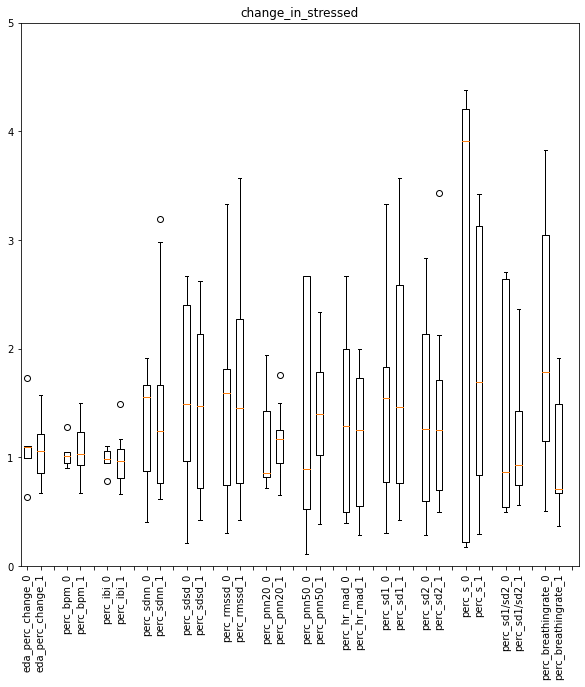

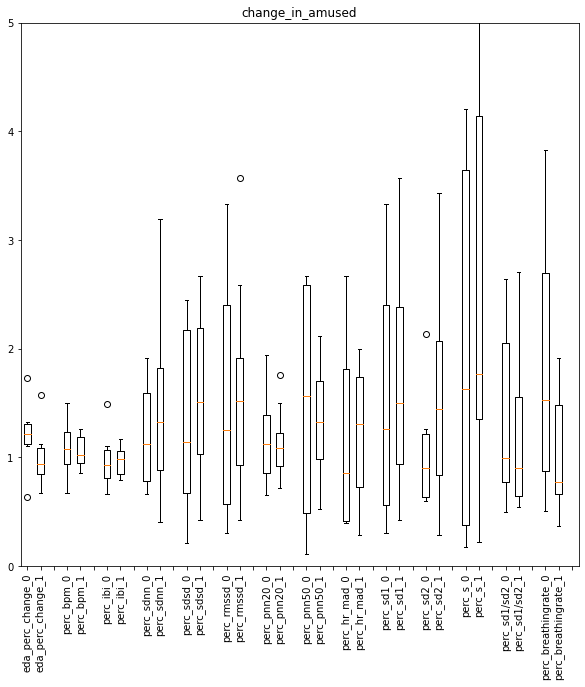

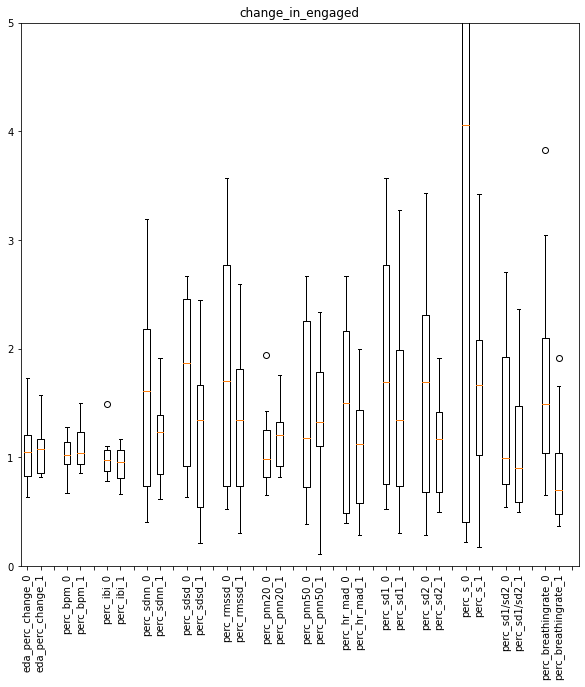

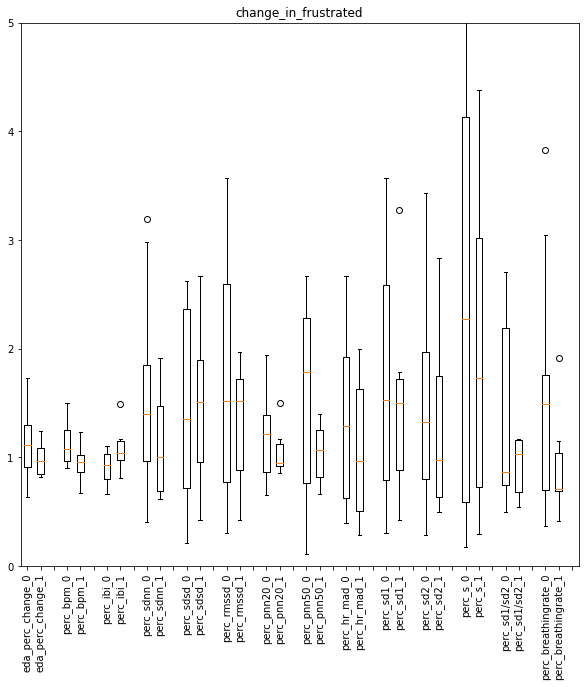

In [12]:
target_y_labels = ['change_in_stressed','change_in_amused','change_in_engaged','change_in_frustrated']

i = 0
for y in target_y_labels:
    print(y)
    print(i)
    i+=1
    box_plt_data = []
    labels = []
    for x in x_features:
        box_plt_data.append(dataset_perc.loc[dataset_perc[y] != 1][x])
        labels.append(str(x)+'_0')
        box_plt_data.append(dataset_perc.loc[dataset_perc[y] == 1][x])
        labels.append(str(x)+'_1')
        box_plt_data.append(0)
        labels.append('')
    plt.figure(figsize=(10,10))
    plt.title(y)
    plt.boxplot(box_plt_data,labels = labels)
    plt.xticks(rotation = 90)
    plt.ylim(0,5)
    plt.savefig('figures/'+str(y)+'.png')


ML models

In [10]:
# Support Vecotr Machine

def svc(x_train,x_test, y_train, y_test):
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring shows the proportion of correct classifications

    min_features_to_select = 1  # Minimum number of features to consider
    rfecv = RFECV(
        estimator=svc,
        step=1,
        # cv=StratifiedKFold(3),
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
    )
    rfecv.fit(x_train, y_train)
    rfecv.predict(x_test)

    # print()
    # print("The train accuracy:", rfecv.score(x_train, y_train))
    # print("The test accuracy:", rfecv.score(x_test, y_test))
    # print("Optimal number of features : %d" % rfecv.n_features_)
    # print(rfecv.transform(x_train))
    print('Selected Features:', x_features[rfecv.get_support(indices=False)])

    return x_features[rfecv.get_support(indices=False)], rfecv.score(x_test, y_test)

change_in_amused
0


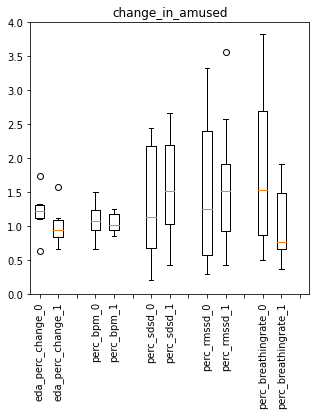

In [17]:
target_y_labels = ['change_in_amused']

selected_features = ['eda_perc_change', 'perc_bpm', 'perc_sdsd', 'perc_rmssd','perc_breathingrate']
i = 0
for y in target_y_labels:
    print(y)
    print(i)
    i+=1
    box_plt_data = []
    labels = []
    for x in selected_features:
        box_plt_data.append(dataset_perc.loc[dataset_perc[y] != 1][x])
        labels.append(str(x)+'_0')
        box_plt_data.append(dataset_perc.loc[dataset_perc[y] == 1][x])
        labels.append(str(x)+'_1')
        box_plt_data.append(0)
        labels.append('')
    plt.figure(figsize=(5,5))
    plt.title(y)
    plt.boxplot(box_plt_data,labels = labels)
    plt.xticks(rotation = 90)
    plt.ylim(0,4)
    plt.savefig('figures/'+str(y)+'_subset.png')
